<img src="ml_map.png" alt="Drawing" style="width: 800px;">

### Problem definition 
* Predict if a customer is going to purchase licensed version of the application or not based on the usage of the application.
* In our case, the problem we will be exploring is binary classification.





In [5]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [6]:
#load the data
df = pd.read_csv("data/vyapar/train.csv") 
df.shape # (rows, columns)

(49863, 409)

#### Data Exploration (exploratory data analysis or EDA)

In [7]:
df.head()

,add_cash_open_count,add_cash_save_count,add_expense_category_open_count,add_expense_category_save_count,add_item_open_count,add_item_save_count,add_line_item_open_count,add_line_item_save_count,add_new_bank_open_count,add_new_bank_save_count,...,verify_otp_ftu_count,whatsapp_greeting_view_count,whatsapp_permission_accepted_count,whatsapp_permission_not_accepted_count,withdraw_cheque_open_count,withdraw_cheque_save_count,withdraw_money_bank_adjustment_save_count,withdraw_money_from_bank_open_count,zero_balance_party_count,licenses
0,0,0,0,0,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0.939374
1    0.060626
Name: licenses, dtype: float64


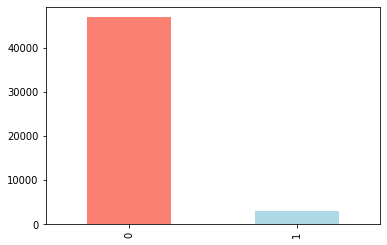

In [8]:
print(df.licenses.value_counts(normalize =True)) #94% won't purchase, 6% purchase 

# Plot the value counts with a bar graph
df.licenses.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49863 entries, 0 to 49862
Columns: 409 entries, add_cash_open_count to licenses
dtypes: int64(409)
memory usage: 155.6 MB


In [10]:
df.describe()

,add_cash_open_count,add_cash_save_count,add_expense_category_open_count,add_expense_category_save_count,add_item_open_count,add_item_save_count,add_line_item_open_count,add_line_item_save_count,add_new_bank_open_count,add_new_bank_save_count,...,verify_otp_ftu_count,whatsapp_greeting_view_count,whatsapp_permission_accepted_count,whatsapp_permission_not_accepted_count,withdraw_cheque_open_count,withdraw_cheque_save_count,withdraw_money_bank_adjustment_save_count,withdraw_money_from_bank_open_count,zero_balance_party_count,licenses
count,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,...,49863.000000,49863.0,49863.0,49863.0,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000
mean,0.015884,0.015342,0.053146,0.038004,1.863225,1.418808,4.805427,3.528448,0.016605,0.034374,...,0.160379,0.0,0.0,0.0,0.001324,0.001083,0.003650,0.002005,0.003830,0.060626
std,0.620363,0.627912,0.629696,0.530544,10.853107,9.705541,24.694960,20.471683,0.266310,0.474091,...,1.291500,0.0,0.0,0.0,0.119657,0.114170,0.191855,0.097479,0.143744,0.238646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118.000000,119.000000,54.000000,51.000000,562.000000,540.000000,1450.000000,1240.000000,18.000000,26.000000,...,65.000000,0.0,0.0,0.0,22.000000,21.000000,32.000000,11.000000,17.000000,1.000000


#### Correlation between independent variables

In [11]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,add_cash_open_count,add_cash_save_count,add_expense_category_open_count,add_expense_category_save_count,add_item_open_count,add_item_save_count,add_line_item_open_count,add_line_item_save_count,add_new_bank_open_count,add_new_bank_save_count,...,verify_otp_ftu_count,whatsapp_greeting_view_count,whatsapp_permission_accepted_count,whatsapp_permission_not_accepted_count,withdraw_cheque_open_count,withdraw_cheque_save_count,withdraw_money_bank_adjustment_save_count,withdraw_money_from_bank_open_count,zero_balance_party_count,licenses
add_cash_open_count,1.000000,0.974099,0.382270,0.410388,0.023461,0.021266,0.025259,0.024849,0.070147,0.097156,...,-0.000026,NaN,NaN,NaN,0.002959,0.003155,0.046189,0.132462,0.000667,0.024517
add_cash_save_count,0.974099,1.000000,0.380791,0.406479,0.021367,0.019132,0.020458,0.020301,0.051608,0.091402,...,0.003594,NaN,NaN,NaN,-0.000270,-0.000232,0.046316,0.130888,-0.000651,0.023505
add_expense_category_open_count,0.382270,0.380791,1.000000,0.897005,0.131708,0.126091,0.082381,0.078837,0.119594,0.187156,...,0.003798,NaN,NaN,NaN,0.002260,-0.000801,0.180670,0.057075,0.023010,0.048624
add_expense_category_save_count,0.410388,0.406479,0.897005,1.000000,0.097083,0.091974,0.086713,0.083649,0.107387,0.181864,...,-0.000232,NaN,NaN,NaN,0.002999,-0.000679,0.184438,0.056307,0.022285,0.043736
add_item_open_count,0.023461,0.021367,0.131708,0.097083,1.000000,0.992339,0.256369,0.243811,0.062736,0.077107,...,0.013721,NaN,NaN,NaN,0.008896,0.006917,0.018723,0.032884,0.016354,0.039192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
withdraw_cheque_save_count,0.003155,-0.000232,-0.000801,-0.000679,0.006917,0.005998,0.044298,0.030285,0.056795,0.087868,...,0.007391,NaN,NaN,NaN,0.971743,1.000000,0.095957,0.264705,-0.000253,0.004951
withdraw_money_bank_adjustment_save_count,0.046189,0.046316,0.180670,0.184438,0.018723,0.018189,0.026898,0.024810,0.122068,0.271592,...,-0.001148,NaN,NaN,NaN,0.095887,0.095957,1.000000,0.386734,-0.000507,0.007432
withdraw_money_from_bank_open_count,0.132462,0.130888,0.057075,0.056307,0.032884,0.032478,0.072561,0.066944,0.117691,0.196831,...,0.004614,NaN,NaN,NaN,0.264562,0.264705,0.386734,1.000000,-0.000548,0.011153
zero_balance_party_count,0.000667,-0.000651,0.023010,0.022285,0.016354,0.013254,0.023448,0.020208,0.009340,0.007485,...,-0.002013,NaN,NaN,NaN,-0.000295,-0.000253,-0.000507,-0.000548,1.000000,0.049355


In [12]:
df.var()

add_cash_open_count                            0.384851
add_cash_save_count                            0.394273
add_expense_category_open_count                0.396518
add_expense_category_save_count                0.281477
add_item_open_count                          117.789924
                                                ...    
withdraw_cheque_save_count                     0.013035
withdraw_money_bank_adjustment_save_count      0.036808
withdraw_money_from_bank_open_count            0.009502
zero_balance_party_count                       0.020662
licenses                                       0.056952
Length: 409, dtype: float64

In [13]:
var = df.var()
variable = []
columns = df.columns

for i in range(0, len(var)):
    if var[i] >= 10:
        variable.append(columns[i])
print(variable), print(len(variable))

['add_item_open_count', 'add_item_save_count', 'add_line_item_open_count', 'add_line_item_save_count', 'add_party_save_count', 'app_launched_count', 'business_status_view_count', 'edit_item_open_count', 'edit_sale_save_count', 'event_tax_type_spinner_changed_count', 'item_adjustment_save_count', 'item_detail_edit_item_count', 'item_detail_screen_open_count', 'item_home_screen_tab_selected_count', 'party_detail_count', 'payment_in_save_count', 'purchase_save_count', 'reports_view_count', 'sale_open_count', 'sale_save_count', 'user_completed_add_item_count', 'user_completed_add_party_count']
22


(None, None)

In [14]:
df_var_filtered = df[variable]
df_var_filtered.head()

,add_item_open_count,add_item_save_count,add_line_item_open_count,add_line_item_save_count,add_party_save_count,app_launched_count,business_status_view_count,edit_item_open_count,edit_sale_save_count,event_tax_type_spinner_changed_count,...,item_detail_screen_open_count,item_home_screen_tab_selected_count,party_detail_count,payment_in_save_count,purchase_save_count,reports_view_count,sale_open_count,sale_save_count,user_completed_add_item_count,user_completed_add_party_count
0,4,2,0,0,0,2,0,0,0,0,...,3,3,2,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,4,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [15]:
#High correlation filter

In [90]:
#Feature selection
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df.drop("licenses", axis = 1),df.licenses)

RandomForestRegressor(max_depth=10, random_state=1)

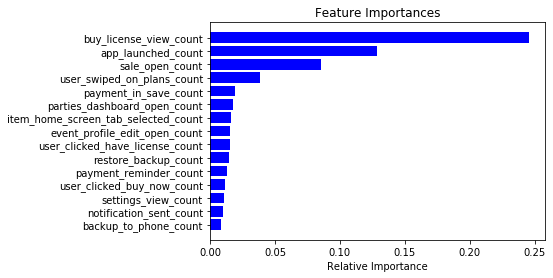

In [91]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 32 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [33]:
list(features[indices])

['edit_item_open_count',
 'sade_panel_all_parties_count',
 'add_party_save_count',
 'side_panel_item_count',
 'sale_dashboard_open_count',
 'add_line_item_save_count',
 'profile_saved_count',
 'add_item_open_count',
 'add_line_item_open_count',
 'sale_report_count',
 'sale_save_count',
 'user_opened_premium_report_count',
 'party_detail_count',
 'party_home_screen_tab_selected_count',
 'business_status_view_count',
 'event_tax_type_spinner_changed_count',
 'reports_view_count',
 'backup_to_phone_count',
 'notification_sent_count',
 'settings_view_count',
 'user_clicked_buy_now_count',
 'payment_reminder_count',
 'restore_backup_count',
 'user_clicked_have_license_count',
 'event_profile_edit_open_count',
 'item_home_screen_tab_selected_count',
 'parties_dashboard_open_count',
 'payment_in_save_count',
 'user_swiped_on_plans_count',
 'sale_open_count',
 'app_launched_count',
 'buy_license_view_count']

In [34]:
variable

['add_item_open_count',
 'add_item_save_count',
 'add_line_item_open_count',
 'add_line_item_save_count',
 'add_party_save_count',
 'app_launched_count',
 'business_status_view_count',
 'edit_item_open_count',
 'edit_sale_save_count',
 'event_tax_type_spinner_changed_count',
 'item_adjustment_save_count',
 'item_detail_edit_item_count',
 'item_detail_screen_open_count',
 'item_home_screen_tab_selected_count',
 'party_detail_count',
 'payment_in_save_count',
 'purchase_save_count',
 'reports_view_count',
 'sale_open_count',
 'sale_save_count',
 'user_completed_add_item_count',
 'user_completed_add_party_count']

In [35]:
combined = set(list(features[indices]) + variable)
combined

{'add_item_open_count',
 'add_item_save_count',
 'add_line_item_open_count',
 'add_line_item_save_count',
 'add_party_save_count',
 'app_launched_count',
 'backup_to_phone_count',
 'business_status_view_count',
 'buy_license_view_count',
 'edit_item_open_count',
 'edit_sale_save_count',
 'event_profile_edit_open_count',
 'event_tax_type_spinner_changed_count',
 'item_adjustment_save_count',
 'item_detail_edit_item_count',
 'item_detail_screen_open_count',
 'item_home_screen_tab_selected_count',
 'notification_sent_count',
 'parties_dashboard_open_count',
 'party_detail_count',
 'party_home_screen_tab_selected_count',
 'payment_in_save_count',
 'payment_reminder_count',
 'profile_saved_count',
 'purchase_save_count',
 'reports_view_count',
 'restore_backup_count',
 'sade_panel_all_parties_count',
 'sale_dashboard_open_count',
 'sale_open_count',
 'sale_report_count',
 'sale_save_count',
 'settings_view_count',
 'side_panel_item_count',
 'user_clicked_buy_now_count',
 'user_clicked_have_

In [36]:
len(combined)

40

In [37]:
df_f = df[combined]
df_f["target"] = df["licenses"]
df_f.head()

C:\Users\abhir\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,edit_sale_save_count,add_party_save_count,profile_saved_count,add_item_save_count,reports_view_count,user_swiped_on_plans_count,party_detail_count,edit_item_open_count,settings_view_count,purchase_save_count,...,sade_panel_all_parties_count,sale_dashboard_open_count,add_line_item_save_count,sale_open_count,sale_save_count,payment_in_save_count,buy_license_view_count,user_completed_add_item_count,payment_reminder_count,target
0,0,0,0,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,0,0,...,0,0,0,4,2,0,0,0,0,0
4,0,0,2,0,0,0,0,0,2,0,...,0,0,0,2,0,0,0,0,0,0


In [38]:
#TODO: check if there are any categorical columns, if yes convert them using dummies
#expirement with PCA
X = df_f.drop("target", axis=1)
y = df_f["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

In [39]:
#random forest classifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[13955    93]
 [  754   157]]

 Accuracy Score :  0.943378568086102

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     14048
           1       0.63      0.17      0.27       911

    accuracy                           0.94     14959
   macro avg       0.79      0.58      0.62     14959
weighted avg       0.93      0.94      0.93     14959



### Over Sampling

In [28]:
from collections import Counter
Counter(y_train)

Counter({0: 32807, 1: 2097})

In [40]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(0.75)

X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 32792, 1: 2112})
The number of classes after fit Counter({0: 32792, 1: 24594})


C:\Users\abhir\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [41]:
os_RF_clf = RandomForestClassifier()

os_RF_clf.fit(X_train_ns, y_train_ns)

y_pred = os_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[13478   570]
 [  676   235]]

 Accuracy Score :  0.9167056621431914

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14048
           1       0.29      0.26      0.27       911

    accuracy                           0.92     14959
   macro avg       0.62      0.61      0.61     14959
weighted avg       0.91      0.92      0.91     14959



In [42]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(0.75)

X_train_ns, y_train_ns = smt.fit_sample(X_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

smt_RF_clf = RandomForestClassifier()

smt_RF_clf.fit(X_train_ns, y_train_ns)

y_pred = smt_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

C:\Users\abhir\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 32792, 1: 2112})
The number of classes after fit Counter({0: 32738, 1: 24540})
Confustion Matrix : 

 [[13225   823]
 [  572   339]]

 Accuracy Score :  0.906745103282305

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     14048
           1       0.29      0.37      0.33       911

    accuracy                           0.91     14959
   macro avg       0.63      0.66      0.64     14959
weighted avg       0.92      0.91      0.91     14959



Text(0.5, 1.0, 'Number of observations per class')

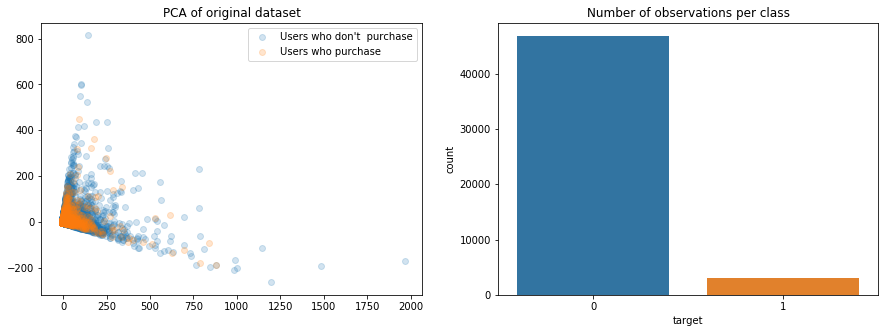

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dataset to 2 feature dimensions in order to visualize the data
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize= (15,5))

ax[0].scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], label="Users who don't  purchase", alpha=0.2)
ax[0].scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], label="Users who purchase", alpha=0.2)
ax[0].set_title('PCA of original dataset')
ax[0].legend()

ax[1] = sns.countplot(y)
ax[1].set_title('Number of observations per class')

In [46]:
from sklearn.model_selection import train_test_split
X = df.drop("licenses", axis = 1)
y = df["licenses"]
X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.2)

### Build a pipeline for trying various sampling methods

In [47]:
from sklearn import metrics 
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {}}
    
    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                          'fscore': fscore, 'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'auc': auc}
    
    
    # ------ Class weight ------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'fscore': fscore, 'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'auc': auc}

    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),
                  SMOTE(),
                  ADASYN()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}

    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  TomekLinks(),
                  EditedNearestNeighbours()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == 'NearMiss': technique+=str(sampler.version)
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}
        

    return results

### Build tool to visualize

In [85]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title(f'license no \n{metric}')
        ax[i*2+1].set_title(f'license yes \n{metric}')
    
    # AUC vis
    ax[6].set_title(f'Area under curve')
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

### Try some models

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

### Decision tree

In [70]:
model = DecisionTreeClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: SMOTE
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: ADASYN
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37245)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss1
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss2
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: TomekLinks
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37276), (1, 2418)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 34903), (1, 2418)]


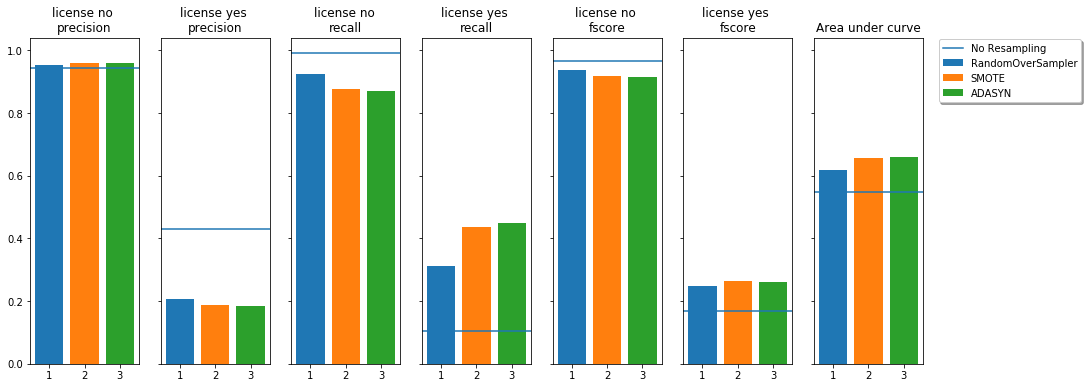

In [86]:
evaluate_method(results, 'oversample')

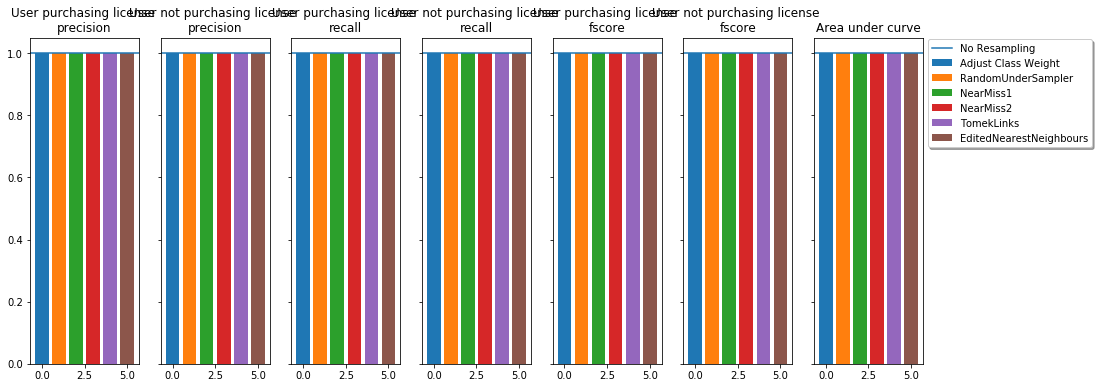

In [73]:
evaluate_method(results, 'undersample')

In [76]:
X = df_f.drop("target", axis = 1)
y = df_f["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

model = RandomForestClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: SMOTE
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: ADASYN
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37311)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss1
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss2
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: TomekLinks
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37168), (1, 2418)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 33729), (1, 2418)]


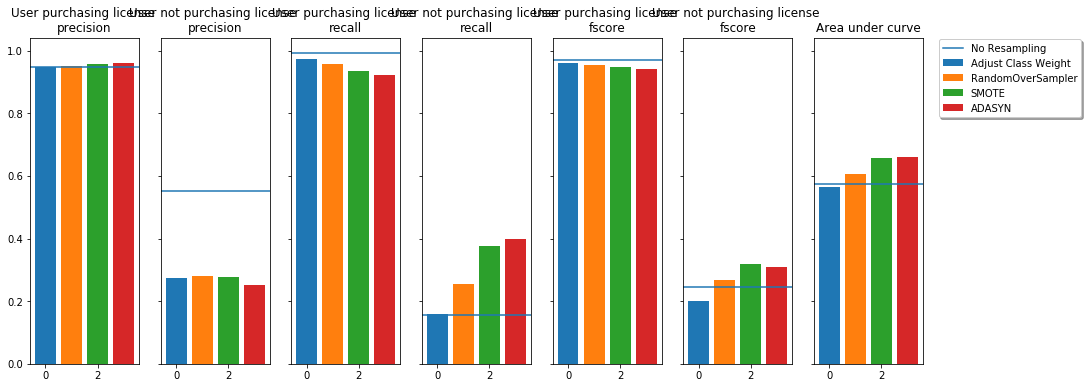

In [77]:
evaluate_method(results, 'oversample')

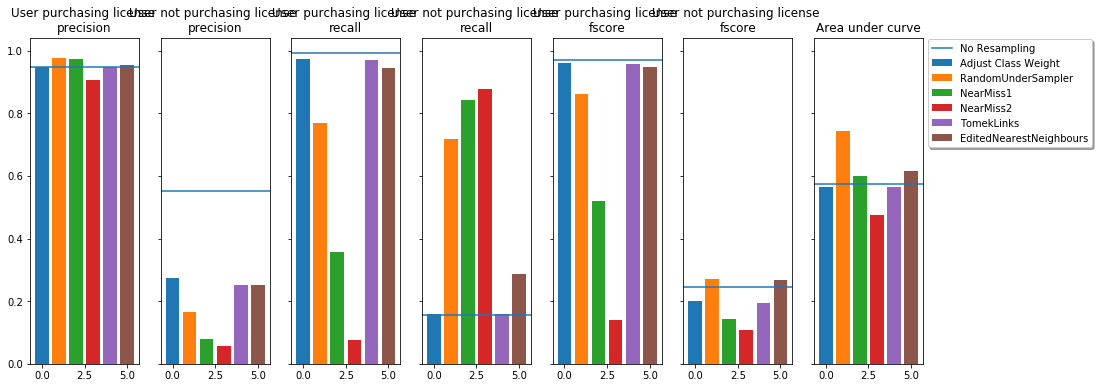

In [78]:

evaluate_method(results, 'undersample')

In [79]:
model = SVC()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)


------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: SMOTE
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: ADASYN
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37311)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss1
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss2
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: TomekLinks
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37168), (1, 2418)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 33729), (1, 2418)]


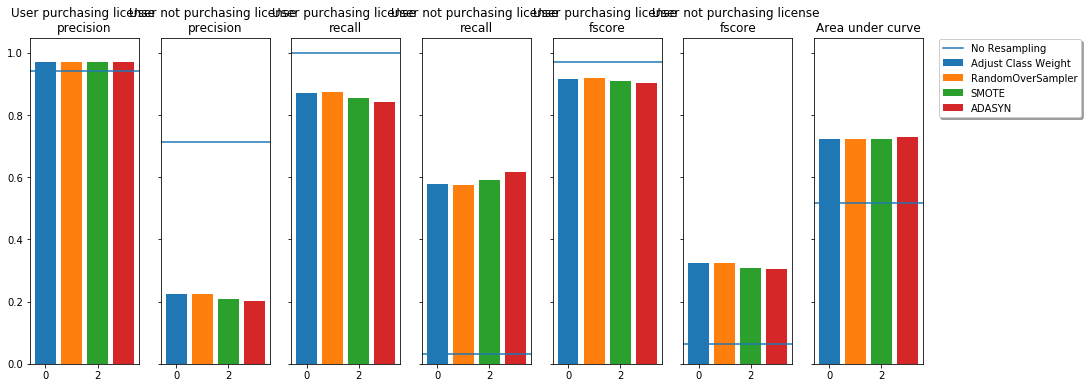

In [80]:
evaluate_method(results, 'oversample')

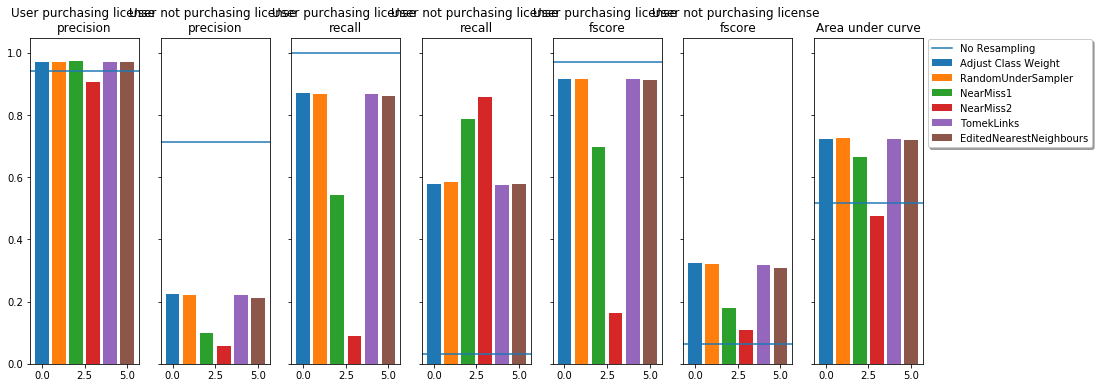

In [81]:
evaluate_method(results, 'undersample')

In [82]:
model = KNeighborsClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: SMOTE
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37472)]
Technique: ADASYN
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37472), (1, 37311)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss1
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: NearMiss2
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 2418), (1, 2418)]
Technique: TomekLinks
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 37168), (1, 2418)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 37472), (1, 2418)]
After resampling: [(0, 33729), (1, 2418)]


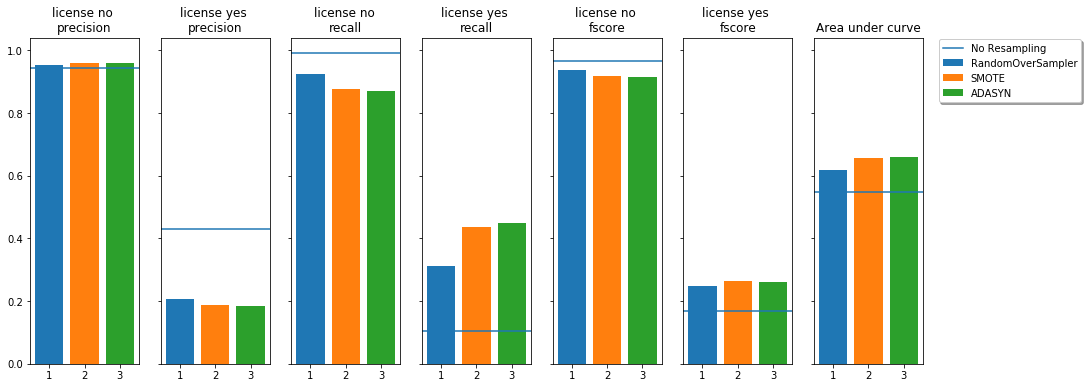

In [88]:
evaluate_method(results, 'oversample')

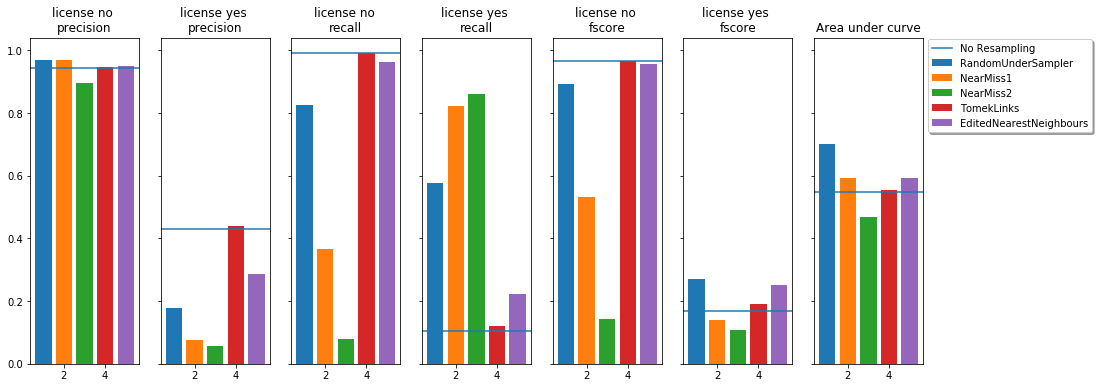

In [87]:
evaluate_method(results, 'undersample')